In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter 
import ast 

In [ ]:
df = pd.read_csv('/Users/kelvinfoo/Desktop/AI Masters/AirBnb Project/Data/listings.csv')
print("Shape of dataframe: ", df.shape)
df.head()

Shape of dataframe:  (25609, 75)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27979,https://www.airbnb.com/rooms/27979,20241225160331,2024-12-26,previous scrape,"Easy going landlord,easy place",NaN,NaN,https://a0.muscache.com/pictures/106247594/1d6...,120541,...,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN
1,47516,https://www.airbnb.com/rooms/47516,20241225160331,2024-12-26,city scrape,Beautiful waterfront house,NaN,NaN,https://a0.muscache.com/pictures/271998/b090ad...,214456,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,55681,https://www.airbnb.com/rooms/55681,20241225160331,2024-12-26,city scrape,Sathorn Terrace Apartment(61),NaN,NaN,https://a0.muscache.com/pictures/71205c61-1553...,263049,...,4.89,4.77,4.85,NaN,f,7,0,3,0,0.21
3,55686,https://www.airbnb.com/rooms/55686,20241225160331,2024-12-26,city scrape,Comfy bedroom near River pier & BTS Taksin.,This is one of our 'Escape' sleep room : hoste...,"Charoen krung street, River pier, Iconsiam, Su...",https://a0.muscache.com/pictures/efc8006f-02bb...,263049,...,4.85,4.74,4.69,NaN,f,7,0,3,0,1.24
4,105042,https://www.airbnb.com/rooms/105042,20241225160331,2024-12-26,city scrape,Central Bangkok 3 Bedroom Apartment,We are Airbnb Super Hosts. Book our apartment ...,Sukhumvit Rd is the shopping and restaurant di...,https://a0.muscache.com/pictures/50404407/23b0...,545890,...,4.89,4.86,4.76,NaN,f,1,1,0,0,0.91


In [3]:
print("Number of missing values in each feature: ")
print(df.isnull().sum()[df.isnull().sum() > 0])

Number of missing values in each feature: 
description                       786
neighborhood_overview           15853
host_name                           3
host_since                          3
host_location                    5912
host_about                      10655
host_response_time               3920
host_response_rate               3920
host_acceptance_rate             3934
host_is_superhost                1284
host_thumbnail_url                  3
host_picture_url                    3
host_neighbourhood              16280
host_listings_count                 3
host_total_listings_count           3
host_has_profile_pic                3
host_identity_verified              3
neighbourhood                   15853
neighbourhood_group_cleansed    25609
bathrooms                        5159
bathrooms_text                     97
bedrooms                         1167
beds                             5187
price                            5129
calendar_updated                25609
has_ava

### **Exploratory Data Analysis**

In [4]:
# Host with most listings 
highest_hostid = df['host_id'].value_counts().idxmax()
highest_hostname = df[df['host_id'] == df['host_id'].value_counts().idxmax()]['host_name'].unique()[0]
highest_hostcount = df['host_id'].value_counts().max()
print(f"Host ID {highest_hostid} with name {highest_hostname} has the most lisings: {highest_hostcount} listings")


Host ID 201677068 with name Curry has the most lisings: 215 listings


In [5]:
# Sample of Curry's listing 
curry_listing = df[df['host_id'] == 201677068]
curry_listing.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5277,31029786,https://www.airbnb.com/rooms/31029786,20241225160331,2024-12-26,city scrape,Near The Grand Palace/ASOK Station/Sukhumvit 2PPL,Welcome to my house~! The building name is Cir...,Directly to the Grand Place only 10 mins!<br /...,https://a0.muscache.com/pictures/d788df25-a492...,201677068,...,4.78,4.71,4.63,NaN,t,215,215,0,0,1.14
5332,30804041,https://www.airbnb.com/rooms/30804041,20241225160331,2024-12-26,city scrape,Near The Grand Palace/ASOK Station/Sukhumvit 5...,Welcome to my house ~! The building name is Ci...,Directly to the Grand Place only 10 mins!<br /...,https://a0.muscache.com/pictures/b299c26d-0c52...,201677068,...,4.82,4.80,4.56,NaN,t,215,215,0,0,2.03
5637,32504596,https://www.airbnb.com/rooms/32504596,20241225160331,2024-12-26,previous scrape,New! Sukhumvit NANA 1BR Suit near BTS 2PPL,A spacious one bedroom on high floor overlooki...,Just 2 subway stops from Bangkok's hottest tra...,https://a0.muscache.com/pictures/miso/Hosting-...,201677068,...,4.76,4.63,4.57,NaN,t,215,215,0,0,1.48
5909,32970026,https://www.airbnb.com/rooms/32970026,20241225160331,2024-12-26,previous scrape,30days! Sukhumvit NANA spacious 1BR 2PPL near...,A spacious one bedroom on high floor overlooki...,Just 2 subway stops from Bangkok's hottest tra...,https://a0.muscache.com/pictures/dcd2cac0-3dfc...,201677068,...,4.82,4.62,4.66,NaN,t,215,215,0,0,1.24
5910,32970501,https://www.airbnb.com/rooms/32970501,20241225160331,2024-12-26,previous scrape,30days! Sukhumvit NANA spacious 1BR near BTS,A spacious one bedroom on high floor overlooki...,Just 2 subway stops from Bangkok's hottest tra...,https://a0.muscache.com/pictures/4b3b9ae9-446f...,201677068,...,4.79,4.63,4.58,NaN,t,215,215,0,0,0.95


In [6]:
# Clean dataset by dropping unnecessary columns 
# Round 1: Scrape related info 
final_df = df.drop(columns = ['scrape_id', 'last_scraped', 'source', 'calendar_last_scraped', 'calculated_host_listings_count',
                        'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                        'calculated_host_listings_count_shared_rooms'])

# Round 2: URL
final_df = final_df.drop(columns = ['listing_url', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url'])

# Round 3: Host related info 
final_df = final_df.drop(columns = ['host_id', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',
                                    'host_about', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_total_listings_count', 'host_listings_count'])

# Round 4: Listing related info 
final_df = final_df.drop(columns = ['neighbourhood', 'neighbourhood_group_cleansed', 'property_type', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
                                    'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
                                    'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'license', 'instant_bookable', 'latitude', 'longitude', 'availability_365'])

# Round 5: Review related info 
final_df = final_df.drop(columns = ['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d','first_review', 'last_review','reviews_per_month',
                                    'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                                    'review_scores_location', 'review_scores_accuracy'])

print(f"Shape of modified dataset: {final_df.shape}")

Shape of modified dataset: (25609, 16)


#### **Host Related EDA**
Majority of listings had verified host, with a little over a quarter of listings having superhost.

In [7]:
percentage_superhost = (final_df['host_is_superhost'].value_counts(normalize = True) * 100).get('t', 0)
print(f"Percentage of listings with superhost: {percentage_superhost:.2f}%")

percentage_verified = (final_df['host_identity_verified'].value_counts(normalize = True) * 100).get('t', 0)
print(f"Percentage of listings with verified host: {percentage_verified:.2f}%")

Percentage of listings with superhost: 30.81%
Percentage of listings with verified host: 90.97%


#### **Reviews Related EDA**
A high percentage of reviews had a review score value of 5. There were only a minority of reviews with scores 3 and below. 

<AxesSubplot:xlabel='review_scores_value', ylabel='Count'>

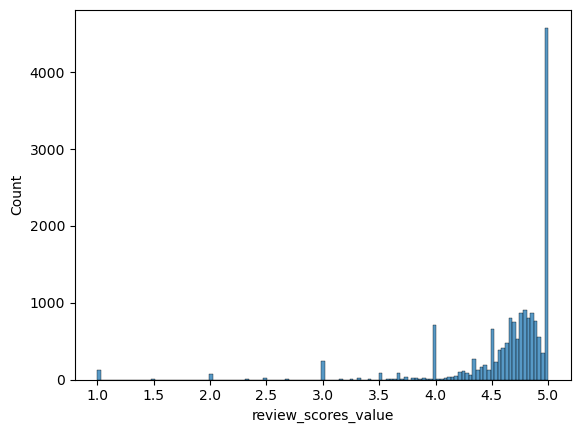

In [8]:
sns.histplot(x = 'review_scores_value', data = final_df)

In [9]:
low_review = df[df['review_scores_value'] <= 3.0]
print(f"Number of listings with review score of 3.0 and below: {low_review.shape[0]}")

highest_hostid_low_review = low_review['host_id'].value_counts().idxmax()
highest_hostcount_low_review = low_review['host_id'].value_counts().max()
print(f"Host ID {highest_hostid_low_review} has the most low-reviewed (3 and below) lisings: {highest_hostcount_low_review} listings")

Number of listings with review score of 3.0 and below: 470
Host ID 227771817 has the most low-reviewed (3 and below) lisings: 19 listings


#### **Listings Related EDA**

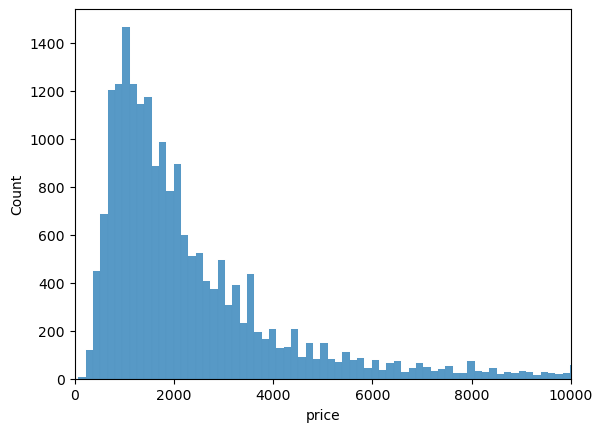

In [10]:
# Distribution of listing prices 
final_df['price'] = final_df['price'].replace({'\$':'', ',':''}, regex = True).astype('float')
sns.histplot(x = 'price', data = final_df)
plt.xlim(0,10000)
plt.show()

Majority of listings fall within the price range of $1000 to $2500, with an exponentially decreasing number of listings have a price of $3000 and above. 

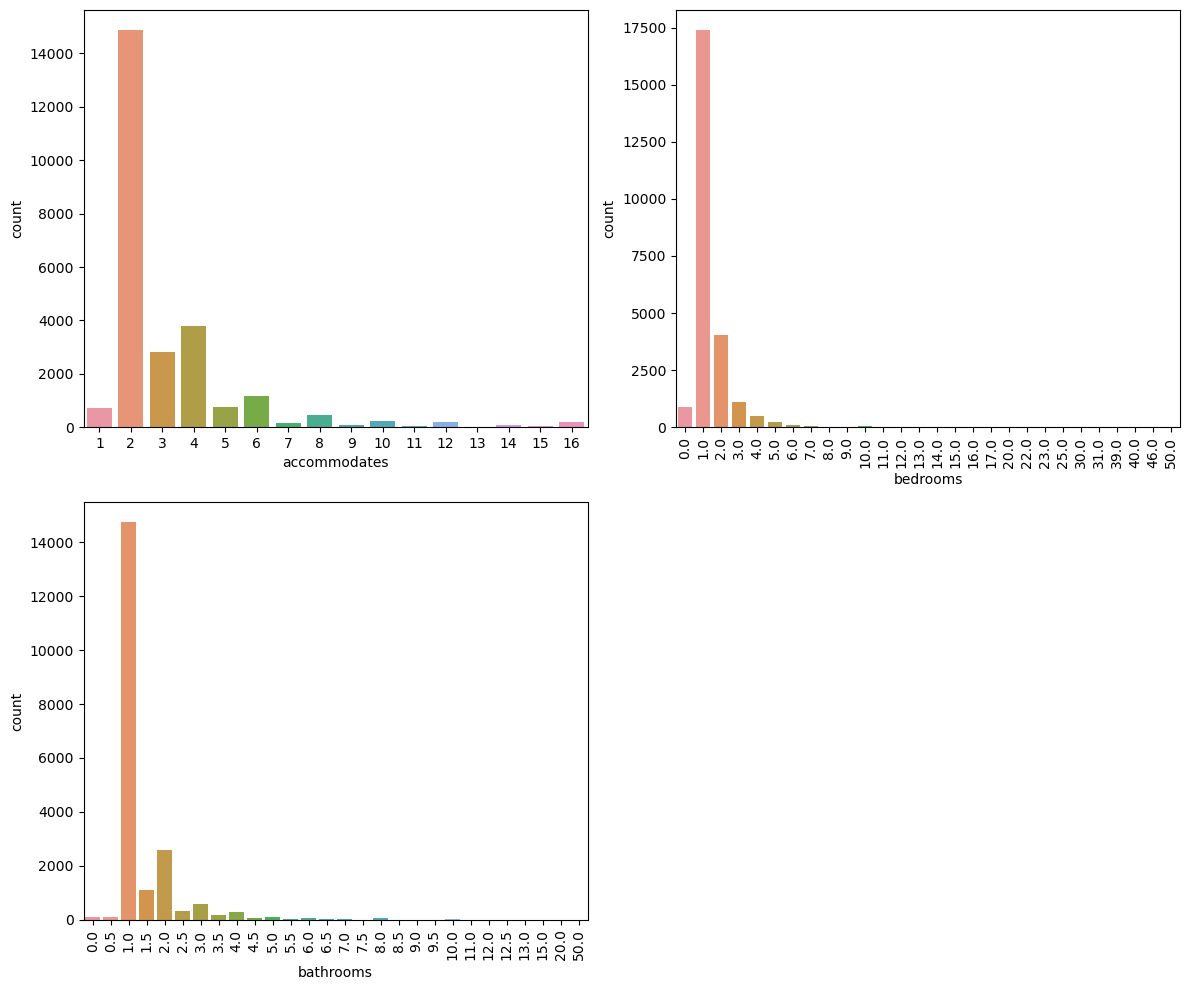

In [11]:
fig, axes = plt.subplots(2, 2, figsize = (12, 10))
sns.countplot(x = 'accommodates', data = final_df, ax = axes[0,0])
sns.countplot(x = 'bedrooms', data = final_df, ax = axes[0,1])
axes[0,1].tick_params(axis = 'x', rotation = 90)
sns.countplot(x = 'bathrooms', data = final_df, ax = axes[1,0])
axes[1,0].tick_params(axis = 'x', rotation = 90)
fig.delaxes(axes[1,1])
plt.tight_layout()
plt.show()

Most listings in Bangkok were studio apartments, that can only host up to 2 guests. This is supported by the fact that most listings has only 1 bedroom, most likely with a queen/king size bed. There is also a considerable number of listings with 2 bedrooms. Majority of listings has only 1 bathroom. 

<AxesSubplot:xlabel='count', ylabel='room_type'>

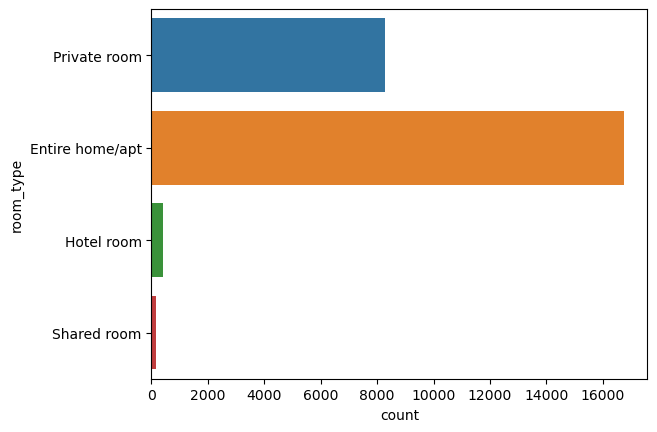

In [12]:
sns.countplot(y = 'room_type', data = final_df)

Most of Bangkok's listings are entire home or apartment, with a considerable amount being private rooms. 

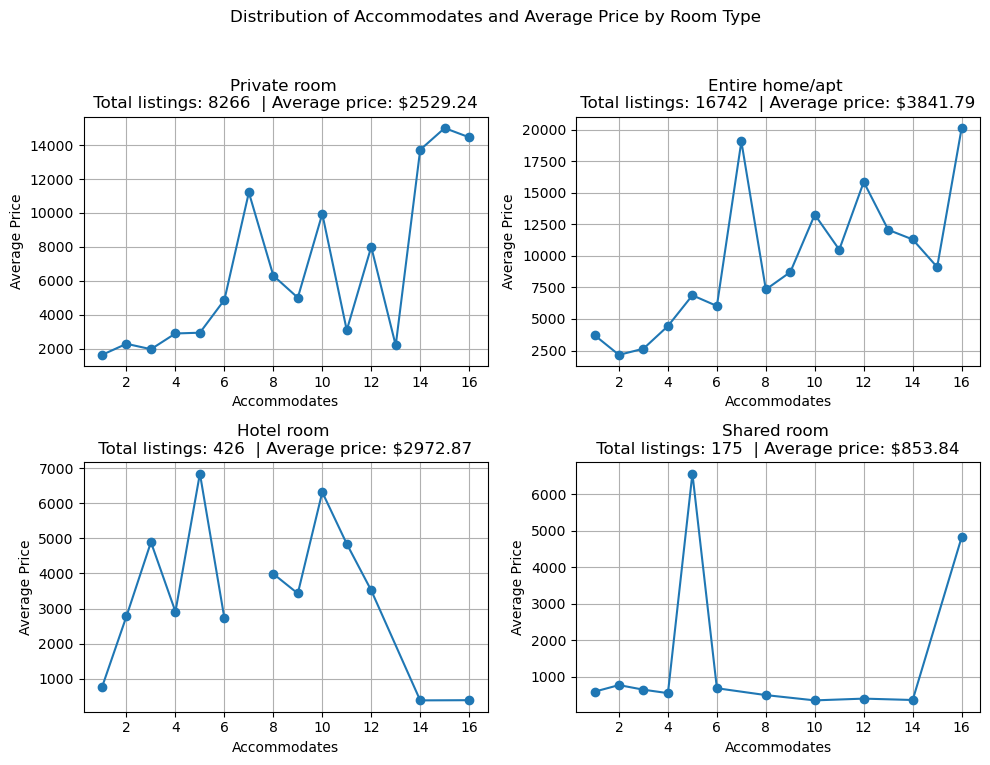

In [13]:
unique_room = final_df['room_type'].unique()
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Distribution of Accommodates and Average Price by Room Type')
axes = axes.flatten()

for i, room_type in enumerate(unique_room): 
    room_data = final_df[final_df['room_type'] == room_type]
    totalCount = room_data.shape[0]
    average_price = room_data['price'].mean()
    accommodate_price = room_data.groupby('accommodates')['price'].mean()
    
    axes[i].plot(accommodate_price.index, accommodate_price.values, marker='o', linestyle='-')
    axes[i].set_title(f"{room_type} \n Total listings: {totalCount}  | Average price: ${average_price:.2f} ")
    axes[i].set_xlabel('Accommodates')
    axes[i].set_ylabel('Average Price')
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
  axes[j].axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

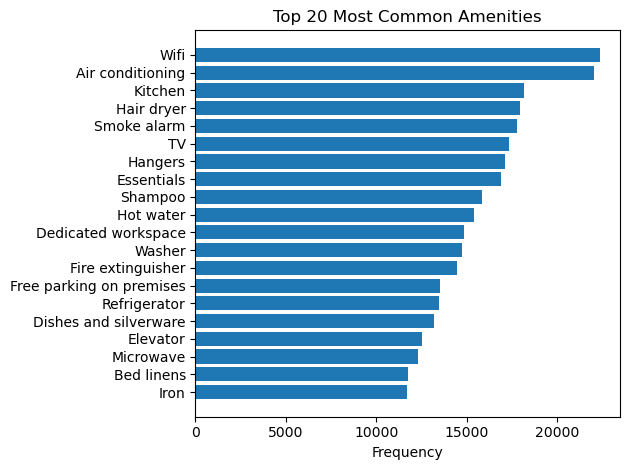

In [14]:
amenities_counter = Counter()
for amenities in final_df['amenities']: 
   try:
    amenitiesList = ast.literal_eval(amenities) 
   except (ValueError, SyntaxError):
    amenitiesList = []
   amenities_counter.update(amenitiesList)

top20_amenities = amenities_counter.most_common(20)
amenities, counts = zip(*top20_amenities)

plt.barh(amenities, counts)
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Amenities')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### **Imputation for Missing Values**

In [15]:
# Impute 'host_is_superhost' and 'host_identity_verified' with 'f' 
final_df['host_is_superhost'].fillna('f', inplace = True)
final_df['host_identity_verified'].fillna('f', inplace = True)

# Impute bathrooms and bedrooms with most frequent value 
final_df['bathrooms'] = final_df['bathrooms'].fillna(final_df['bathrooms'].mean())
final_df['bedrooms'] = final_df['bedrooms'].fillna(final_df['bedrooms'].mean())

# Impute price with mean value grouped by accomodates 
final_df['price'] = final_df['price'].fillna(final_df.groupby('accommodates')['price'].transform(lambda x: x.mean()))

# Impute review score values with mean value 
final_df['review_scores_value'] = final_df['review_scores_value'].fillna(final_df['review_scores_value'].mean())

In [16]:
final_df = final_df.drop(columns = ['id', 'bathrooms_text', 'beds'])

final_df['bathrooms'] = final_df['bathrooms'].astype('int')
final_df['bedrooms'] = final_df['bedrooms'].astype('int')
final_df['price'] = final_df['price'].astype('int')
final_df['review_scores_value'] = round(final_df['review_scores_value'].astype('float'),2)

print(final_df.isnull().sum())
final_df.head()

name                          0
description                 786
neighborhood_overview     15853
host_is_superhost             0
host_identity_verified        0
neighbourhood_cleansed        0
room_type                     0
accommodates                  0
bathrooms                     0
bedrooms                      0
amenities                     0
price                         0
review_scores_value           0
dtype: int64


,name,description,neighborhood_overview,host_is_superhost,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,amenities,price,review_scores_value
0,"Easy going landlord,easy place",NaN,NaN,f,f,Bang Na,Private room,2,1,1,"[""Shampoo"", ""TV with standard cable"", ""First a...",2204,4.66
1,Beautiful waterfront house,NaN,NaN,f,t,Don Mueang,Entire home/apt,1,1,4,"[""TV with standard cable"", ""Pets allowed"", ""Sm...",4440,4.66
2,Sathorn Terrace Apartment(61),NaN,NaN,t,t,Bang Rak,Private room,2,1,1,"[""Shampoo"", ""Kitchen"", ""Hangers"", ""Elevator"", ...",1650,4.85
3,Comfy bedroom near River pier & BTS Taksin.,This is one of our 'Escape' sleep room : hoste...,"Charoen krung street, River pier, Iconsiam, Su...",t,t,Sathon,Hotel room,2,1,1,"[""Shampoo"", ""Hangers"", ""Breakfast"", ""Hot water...",1536,4.69
4,Central Bangkok 3 Bedroom Apartment,We are Airbnb Super Hosts. Book our apartment ...,Sukhumvit Rd is the shopping and restaurant di...,f,t,Khlong Toei,Entire home/apt,5,3,3,"[""Shampoo"", ""TV with standard cable"", ""Extra p...",5601,4.76


### **Embeddings Based on Description and Neighbourhood Overview**
The model SentenceTransformer('all-MiniLM-L6-v2') was chosen as the embedding model as it was the most downloaded model for sentence similarity task on Hugging Face. 

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')
final_df['concat_info'] = final_df['description'].fillna(' ') + ' ' + final_df['neighborhood_overview'].fillna(' ')

embeddings = []

batch_size = 1000
for i in range(0, len(final_df), batch_size):
    batch = final_df['concat_info'].iloc[i:i+batch_size]
    batch_embeddings = model.encode(batch.tolist())
    embeddings.extend(batch_embeddings)
    print(f"Embedding completed for {i + batch_size} rows")

final_df['embedding'] = embeddings